<a href="https://colab.research.google.com/github/gourav1996-grv/BDSN_Project/blob/main/BDSN_A21013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting Up Spark Environment 

In this cell we are installing pyspark and the necessary modules.


In [2]:
!apt-get update > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

!tar xf spark-3.1.2-bin-hadoop3.2.tgz
#!pip install -q findspark
!pip install -q pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 50.4 MB/s 


We are setting up environment vaariable for Java and spark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

#Loading Data and Necessary Packages

In [4]:
#import findspark
#findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

Made use of plotly for better visualisation and hovering effect of graph

In [5]:
import plotly.express  as px
import plotly.graph_objects as go
fig = go.Figure()
import pandas as pd
import numpy as np

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1lIsgI8j6IuNvLo-qlXUkrVK1pkSvW1rU' -O udemy.csv

--2022-03-05 15:23:33--  https://docs.google.com/uc?export=download&id=1lIsgI8j6IuNvLo-qlXUkrVK1pkSvW1rU
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.139, 74.125.195.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v0qppj5ei6j4vgdd00bek7lmbhlovgq2/1646493750000/03498884685229214067/*/1lIsgI8j6IuNvLo-qlXUkrVK1pkSvW1rU?e=download [following]
--2022-03-05 15:23:34--  https://doc-14-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v0qppj5ei6j4vgdd00bek7lmbhlovgq2/1646493750000/03498884685229214067/*/1lIsgI8j6IuNvLo-qlXUkrVK1pkSvW1rU?e=download
Resolving doc-14-7g-docs.googleusercontent.com (doc-14-7g-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-14-7g-docs.googleusercontent.com (doc-14-7g-docs.goog

In [7]:
df = spark.read.csv("/content/udemy.csv",header=True,inferSchema=True)

In [8]:
df.show()

+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+------------------+-------------------+----------------+
|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|  content_duration|published_timestamp|         subject|
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+------------------+-------------------+----------------+
|  1070968|Ultimate Investme...|https://www.udemy...|   true|  200|           2147|         23|          51|        All Levels|               1.5|2017-01-18 20:58:58|Business Finance|
|  1113822|Complete GST Cour...|https://www.udemy...|   true|   75|           2792|        923|         274|        All Levels|              39.0|2017-03-09 16:34:20|Business Finance|
|  1006314|Financial Modelin...|https://www.udemy...|   true|   45|           21

In [9]:
df.printSchema()

root
 |-- course_id: integer (nullable = true)
 |-- course_title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- is_paid: boolean (nullable = true)
 |-- price: integer (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- level: string (nullable = true)
 |-- content_duration: string (nullable = true)
 |-- published_timestamp: timestamp (nullable = true)
 |-- subject: string (nullable = true)



#Data Visualization & EDA

**Here I am just trying to create a copy of our original spark data frame into variable data and it will hold in terms of pandas data frame.**

In [22]:
data=df.toPandas().copy()

In [23]:
type(data)

pandas.core.frame.DataFrame

we can see data is of pandas dataframe

In [24]:
type(df)

pyspark.sql.dataframe.DataFrame

whereas our original df dataframe is of spark only

There is 2 reason for doing this:-


1.   I dont wanted to disturb our original spark data frame
2.   We get a lot and better options in pandas data frame for visualization point of view. At the end, it's visualization, which makes us better to understand data.



In [25]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18,Business Finance


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   course_id            3683 non-null   int32         
 1   course_title         3683 non-null   object        
 2   url                  3683 non-null   object        
 3   is_paid              3683 non-null   bool          
 4   price                3683 non-null   int32         
 5   num_subscribers      3683 non-null   int32         
 6   num_reviews          3683 non-null   int32         
 7   num_lectures         3683 non-null   int32         
 8   level                3683 non-null   object        
 9   content_duration     3683 non-null   object        
 10  published_timestamp  3683 non-null   datetime64[ns]
 11  subject              3678 non-null   object        
dtypes: bool(1), datetime64[ns](1), int32(5), object(5)
memory usage: 248.3+ KB


I am grouping data in terms of year and course id and then sorting out the values.

In [27]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])
data['year'] = data['published_timestamp'].dt.year
Year_wise = data.groupby('year')['course_id'].count().sort_values().reset_index()
Year_wise.rename({'course_id':'Number of Courses'},axis = 1, inplace = True)
fig = px.bar(Year_wise, y = 'Number of Courses', x = 'year', color = 'year')
fig.show()

**We can see a gradual Increase in people releasing their Courses over the peroid of time**. **Especially there has been a sudden rise in the number of courses from 2014 to 2015.** 

I am keeping count of all the subject in Subject variable and then making use of pie see the distribution.

In [28]:
Subject = pd.DataFrame(data['subject'].value_counts()).reset_index(drop = False)
fig = px.pie(Subject, values =Subject.subject, names = Subject['index'],
             title='Distribution of Various Courses on Udemy!')
fig.show()



*   32.6% courses on the Udemy is for WEB DEVELOPMENT
*   32.5% courses on the Udemy is for BUSINESS FINANCE
*   18.5% courses on the Udemy is for MUSICAL INSTRUMENT
*   16.4% course on the Udemy is for GRAPHIC DESIGN





Here we are fetching Duration distribution across type of Course 

In [29]:
fig = px.box(data,
       x='content_duration',
       y='is_paid',
       orientation='h',
       color='is_paid',
       title='Duration Distribution Across Type of Course',
       color_discrete_sequence=['#03cffc','#eb03fc']
      )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Paid Course')
fig.show()

**We can see that paid courses have a higher duration. It is also worth noting that duration varies considerabily more on paid courses as well.**

Here we are fetching the number of subscribers and then sorting the value. Through this we will be able to get Top 25 most Famous Courses with Price on the basis of number of subscribers by slicing 0 to 24.

In [30]:
top25_paid = data.sort_values("num_subscribers", ascending=False)[0:25].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index(drop =True)
fig = px.bar(top25_paid,
       y = 'course_title',
       x= 'num_subscribers',
       orientation = 'h',
       color='num_subscribers',
      hover_data=['is_paid','num_reviews','num_lectures'])


fig.update_layout(showlegend=False)
fig.update_xaxes(title='Number of Subscribers')
fig.update_yaxes(title='Course Title',showticklabels=False)
fig.show()

**Being a coding enthusiastic person. It makes me happy to see that around 20 course out of top 25 are realated to coding.** 🙂

same as above only but it is for free and not paid

In [31]:
Unpaid = data[data['is_paid']==False]

top25_free = Unpaid.sort_values("num_subscribers", 
                                ascending=False)[0:25].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()
fig = px.bar(top25_free,
       y = 'course_title',
       x= 'num_subscribers',
       orientation = 'h',
       color='num_subscribers',
      hover_data=['num_reviews','num_lectures','year'])


fig.update_layout(showlegend=False)
fig.update_xaxes(title='Number of Subscribers')
fig.update_yaxes(title='Course Title',showticklabels=False)
fig.show()

**And same as that of paid is also seen here and more love for coding course has been showered**

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

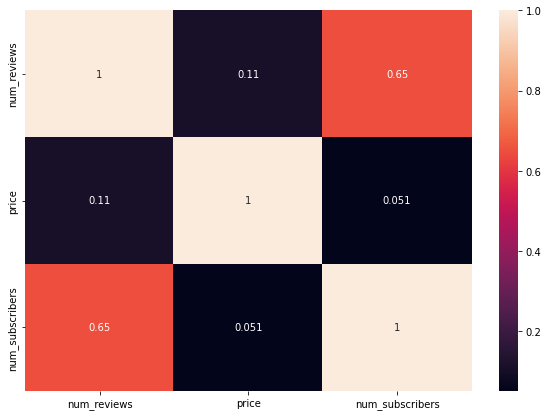

In [33]:
plt.figure(figsize = (10,7))
f = data[['num_reviews','price','num_subscribers','content_duration']].corr()
sns.heatmap(f, annot=True)

**Correlation is a statistical term describing the degree to which two variables move in coordination with one another.**

**We dont see much high correlation among the variables**

#WordCloud

Importing few librariries like re for regular expression related task, and different Text Analytics realed package

**TfidfVectorizer:-Convert a collection of raw documents to a matrix of TF-IDF feature**s

**CountVectorizer:Convert a collection of text documents to a matrix of token counts.**
**This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.**

**Word Clouds are a powerful way to visualise what your audience really thinks about a topic.**

In [34]:
import os, re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

Targeting only course title, so as to know which type/ word of course hihly popular

In [35]:
udemy_title = data['course_title']

we are making use of regex, so as to filter out all letter other than capital and small ato z and after that making it to lowercase and storing in corpus.

In [36]:
corpus = [re.sub("[^a-zA-Z ]+",'', x) for x in udemy_title]
corpus = [x.lower() for x in corpus]
corpus

['ultimate investment banking course',
 'complete gst course  certification  grow your ca practice',
 'financial modeling for business analysts and consultants',
 'beginner to pro  financial analysis in excel ',
 'how to maximize your profits trading options',
 'trading penny stocks a guide for all levels in ',
 'investing and trading for beginners mastering price charts',
 'trading stock chart patterns for immediate explosive gains',
 'options trading   advanced stock profit and success method',
 'the only investment strategy you need for your retirement',
 'forex trading secrets of the pros with amazons aws',
 'trading options with money flow',
 'financial management risk and return for securities',
 'forex trading course work smarter not harder proven results',
 'python algo trading sentiment trading with news',
 'short selling learn to sell stocks before the fall',
 'basic technical analysis learn the structure of the market',
 'the complete chart pattern trading course a proven ap

In [37]:
single_text = " ".join(corpus)

Here we are joining all corpus into a sinle text

In [38]:
tokens = re.findall("\w+",single_text)


1.   **We are generating tokens without any stopwords.**
2.   **Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document.**



In [39]:
tokens_no_stopwords = [x for x in tokens if x not in STOPWORDS]
tokens_no_stopwords[:20]

['ultimate',
 'investment',
 'banking',
 'course',
 'complete',
 'gst',
 'course',
 'certification',
 'grow',
 'ca',
 'practice',
 'financial',
 'modeling',
 'business',
 'analysts',
 'consultants',
 'beginner',
 'pro',
 'financial',
 'analysis']

In [40]:
wc = WordCloud(width=800, height=600, stopwords=STOPWORDS)

Created a wordcloud instances

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

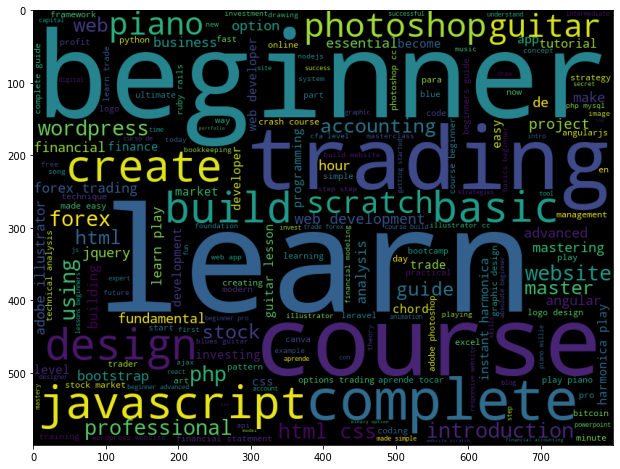

In [42]:
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(single_text))

**We can see the Beginner, trading, photoshop, javascript etc are having high dominancy**

And the same statement can be proof belowed

In [43]:
from collections import Counter

In [44]:
C = Counter(tokens_no_stopwords)
C.most_common(20)

[('learn', 508),
 ('trading', 314),
 ('beginners', 301),
 ('course', 245),
 ('web', 222),
 ('guitar', 222),
 ('design', 203),
 ('piano', 195),
 ('complete', 187),
 ('html', 184),
 ('forex', 173),
 ('photoshop', 173),
 ('build', 172),
 ('create', 162),
 ('play', 159),
 ('javascript', 150),
 ('financial', 146),
 ('wordpress', 138),
 ('css', 135),
 ('website', 129)]

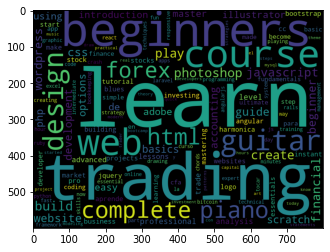

In [45]:
most_fre_words = {k:v for k,v in C.most_common(150)}
plt.imshow(wc.generate_from_frequencies(most_fre_words))

Wordclouud on the basis of most common

In [46]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,year
count,3.683000e+03,3683.000000,3683.000000,3683.000000,3683.00000,3683.000000
mean,6.756596e+05,66.023622,3194.087972,156.063535,40.10372,2015.430084
std,3.433124e+05,60.982453,9498.061750,934.831762,50.35502,1.185274
min,8.324000e+03,0.000000,0.000000,0.000000,0.00000,2011.000000
25%,4.068710e+05,20.000000,111.000000,4.000000,15.00000,2015.000000
50%,6.876420e+05,45.000000,912.000000,18.000000,25.00000,2016.000000
75%,9.608420e+05,95.000000,2537.500000,67.000000,46.00000,2016.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.00000,2017.000000


# Machine Learning with statistical Test

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

segregating data into numerical and categoricaal and converting it to dummies.

In [48]:
num_cols = ['price', 'num_reviews', 'num_lectures']
cat_cols = ['is_paid', 'level', 'subject']
X_data, y_data = data[num_cols].merge(pd.get_dummies(data[cat_cols]), left_index=True, right_index=True), data['num_subscribers']

splitting train test

In [49]:
X_train, X_test,  y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [50]:
col_names = X_train.columns

Doing scaling of data so as to bring all data into a equal scale

In [51]:
scaler = StandardScaler()
scaler = scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train.shape

(2946, 12)

Creating Random forest instances

In [53]:
model = RandomForestRegressor(n_estimators=500, random_state=42)

In [54]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

Fitting the model

In [55]:
y_train_preds = model.predict(X_train)

In [56]:
print("Mean Squared Error on training data is: {:.2f}".format(mean_squared_error(y_train_preds, y_train)))

Mean Squared Error on training data is: 3978148.77


In [57]:
y_pred = model.predict(X_test)

In [58]:
print("Mean Squared Error on testing data is: {:.2f}".format(mean_squared_error(y_pred, y_test)))

Mean Squared Error on testing data is: 69698738.25


The scores are not that good

In [59]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [60]:
#from sklearn import metrics

In [61]:
X_train_sm = X_data
X_train_sm = sm.add_constant(X_train_sm)

lm_sm = sm.OLS(y_data,X_train_sm.astype(float)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



since it's a regression, we can verify which are having p-values less than 0.05 and we can built new model on that variable. P-value more than 0.05 indicates that null hypothesis is accepted and that variable has no contribution in model.

In [62]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        num_subscribers   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     321.3
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:24:31   Log-Likelihood:                -37716.
No. Observations:                3683   AIC:                         7.546e+04
Df Residuals:                    3671   BIC:                         7.553e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

so we will go with column 1,2,4,5,6 as their p-value is less than 0.05

In [63]:
x1=X_data.iloc[:,[1,2,4,5,6]]

In [64]:
X_train1, X_test1,  y_train1, y_test1 = train_test_split(x1, y_data, test_size=0.3, random_state=42)

In [65]:
scaler = StandardScaler()
scaler = scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [67]:
lr = LinearRegression()
lr.fit(X_train1, y_train1)
lr.score(X_test1, y_test1)

0.31834073416874153

In [68]:
model1 = RandomForestRegressor(n_estimators=1000, random_state=42)

In [69]:
model1.fit(X_train1, y_train1)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [70]:
y_train_preds1 = model1.predict(X_train1)

In [71]:
print("Mean Squared Error on training data is: {:.2f}".format(mean_squared_error(y_train_preds1, y_train1)))

Mean Squared Error on training data is: 3710509.83


In [72]:
y_pred1 = model1.predict(X_test1)

In [73]:
print("Mean Squared Error on testing data is: {:.2f}".format(mean_squared_error(y_pred1, y_test1)))

Mean Squared Error on testing data is: 77710290.51


**While our MSE is quite high, it seems that we haven't really overfit the data. It is likely that we will need better features in order to build predictive power, which we don't have currently**

**No issue we will go for classification of subject/Genre** 🙂

#Transformation,Feature Engineering & Pipelining

Here we are again back to our spark dataframe

In [74]:
type(df)

pyspark.sql.dataframe.DataFrame

In [75]:
df.columns

['course_id',
 'course_title',
 'url',
 'is_paid',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'level',
 'content_duration',
 'published_timestamp',
 'subject']

In [76]:
df

DataFrame[course_id: int, course_title: string, url: string, is_paid: boolean, price: int, num_subscribers: int, num_reviews: int, num_lectures: int, level: string, content_duration: string, published_timestamp: timestamp, subject: string]

In [77]:
df.select('course_title','subject').show()

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
|Trading Penny Sto...|Business Finance|
|Investing And Tra...|Business Finance|
|Trading Stock Cha...|Business Finance|
|Options Trading 3...|Business Finance|
|The Only Investme...|Business Finance|
|Forex Trading Sec...|Business Finance|
|Trading Options W...|Business Finance|
|Financial Managem...|Business Finance|
|Forex Trading Cou...|Business Finance|
|Python Algo Tradi...|Business Finance|
|Short Selling: Le...|Business Finance|
|Basic Technical A...|Business Finance|
|The Complete Char...|Business Finance|
|7 Deadly Mistakes...|Business Finance|
|Financial Stateme...|Business Finance|
+--------------------+----------------+
only showing top 20 rows



In [78]:
df.show(5)

+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+
|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration|published_timestamp|         subject|
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+
|  1070968|Ultimate Investme...|https://www.udemy...|   true|  200|           2147|         23|          51|        All Levels|             1.5|2017-01-18 20:58:58|Business Finance|
|  1113822|Complete GST Cour...|https://www.udemy...|   true|   75|           2792|        923|         274|        All Levels|            39.0|2017-03-09 16:34:20|Business Finance|
|  1006314|Financial Modelin...|https://www.udemy...|   true|   45|           2174|       

Here we have grouped data on the basiss of Subject

In [79]:
df.groupBy('subject').count().show()

+-------------------+-----+
|            subject|count|
+-------------------+-----+
|               null|    5|
|   Business Finance| 1195|
|     Graphic Design|  603|
|    Web Development| 1200|
|Musical Instruments|  680|
+-------------------+-----+



In [80]:
df.toPandas()['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

We can see Web Development has little high count than Business Finance

In [81]:
df.toPandas()['subject'].isnull().sum()

5

There are only 5 null subject and we are dropping that

In [82]:
df = df.dropna(subset=('subject'))

In [83]:
df.toPandas()['subject'].isnull().sum()

0

In [84]:
df.show(5)

+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+
|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration|published_timestamp|         subject|
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+
|  1070968|Ultimate Investme...|https://www.udemy...|   true|  200|           2147|         23|          51|        All Levels|             1.5|2017-01-18 20:58:58|Business Finance|
|  1113822|Complete GST Cour...|https://www.udemy...|   true|   75|           2792|        923|         274|        All Levels|            39.0|2017-03-09 16:34:20|Business Finance|
|  1006314|Financial Modelin...|https://www.udemy...|   true|   45|           2174|       

Importing pyspark

In [85]:
import pyspark.ml.feature

In [86]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF
from pyspark.ml.feature import StringIndexer

In [87]:
df.show(5)

+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+
|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration|published_timestamp|         subject|
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+
|  1070968|Ultimate Investme...|https://www.udemy...|   true|  200|           2147|         23|          51|        All Levels|             1.5|2017-01-18 20:58:58|Business Finance|
|  1113822|Complete GST Cour...|https://www.udemy...|   true|   75|           2792|        923|         274|        All Levels|            39.0|2017-03-09 16:34:20|Business Finance|
|  1006314|Financial Modelin...|https://www.udemy...|   true|   45|           2174|       

**Tokenizer does Tokenization. Tokenization is the process of tokenizing or splitting a string, text into a list of tokens.**

**CountVectorizer:Convert a collection of text documents to a matrix of token counts.**
**This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.**

**TfidfVectorizer:-Convert a collection of raw documents to a matrix of TF-IDF feature**s

In [88]:

tokenizer = Tokenizer(inputCol='course_title',outputCol='mytokens')
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')

StringIndexer encodes a string column of labels to a column of label indices. StringIndexer can encode multiple columns

In [89]:
labelEncoder = StringIndexer(inputCol='subject',outputCol='label').fit(df)

In [90]:
labelEncoder.labels

['Web Development',
 'Business Finance',
 'Musical Instruments',
 'Graphic Design']

we have label Encoded the Course title

In [91]:
label_dict = {'Web Development':0.0,
 'Business Finance':1.0,
 'Musical Instruments':2.0,
 'Graphic Design':3.0}

In [92]:
df.show()

+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+------------------+-------------------+----------------+
|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|  content_duration|published_timestamp|         subject|
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+------------------+-------------------+----------------+
|  1070968|Ultimate Investme...|https://www.udemy...|   true|  200|           2147|         23|          51|        All Levels|               1.5|2017-01-18 20:58:58|Business Finance|
|  1113822|Complete GST Cour...|https://www.udemy...|   true|   75|           2792|        923|         274|        All Levels|              39.0|2017-03-09 16:34:20|Business Finance|
|  1006314|Financial Modelin...|https://www.udemy...|   true|   45|           21

In [93]:
df = labelEncoder.transform(df)

Here the label 1 indicates that it is Business finance.

In [94]:
df.show(5)

+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+-----+
|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration|published_timestamp|         subject|label|
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+-----+
|  1070968|Ultimate Investme...|https://www.udemy...|   true|  200|           2147|         23|          51|        All Levels|             1.5|2017-01-18 20:58:58|Business Finance|  1.0|
|  1113822|Complete GST Cour...|https://www.udemy...|   true|   75|           2792|        923|         274|        All Levels|            39.0|2017-03-09 16:34:20|Business Finance|  1.0|
|  1006314|Financial Modelin...|https://www.udemy...|   true

#Machine Learning Model

splitting data into train & test.

In [95]:
(trainDF,testDF) = df.randomSplit((0.7,0.3),seed=42)

In [96]:
trainDF.show()

+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+------------------+-------------------+-------------------+-----+
|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|  content_duration|published_timestamp|            subject|label|
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+------------------+-------------------+-------------------+-----+
|     8324|Javascript for Be...|https://www.udemy...|   true|   20|           3697|        195|          48|        All Levels|               3.0|2011-07-09 05:43:31|    Web Development|  0.0|
|     8325|HTML Tutorial: HT...|https://www.udemy...|   true|   20|          12458|        253|          82|        All Levels|               4.0|2011-09-09 15:28:59|    Web Development|  0.0|
|    11174|Become a Web Deve...|htt

Importing classifiation model Logistic Regression

In [97]:
from pyspark.ml.classification import LogisticRegression

This vectorized features is the output of idf step performed in Pipeling and we are fitting that as features to our Logistic Regression.

In [98]:
lr = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')

In [99]:
from pyspark.ml import Pipeline

Adding the all the transformation into the pipeline

In [100]:
pipeline = Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,lr])

In [101]:
# Building MOdel
lr_model = pipeline.fit(trainDF)

In [102]:
lr_model

PipelineModel_3a9bdce8c65f

In [103]:
predictions = lr_model.transform(testDF)

In [104]:
predictions.show()

+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration|published_timestamp|            subject|label|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    11153|Learn

Here in naked eye only we can see that the label and prediction of most of the data points are getting matched except last two. On checking evaluation parameters only we can say, how good the Model is performing.

#Model Evaluation

We are importing the evaluation package from pyspark

In [105]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [106]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')

We are checking the accuracy of the model.

In [107]:
accuracy = evaluator.evaluate(predictions)

**We are getting an accuracy of above 92%. But....**

In [108]:
accuracy

0.9361904761904762

Is Accuracy gives the actual correct Evaluation. The Answer is, it may not be.

In [109]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [110]:
lr_metric = MulticlassMetrics(predictions['label','prediction'].rdd)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.



**we will also use precision recall and f1 score to evaluate the model.**

Precision and recall are two crucial yet misunderstood topics in machine learning

The recall is the measure of our model correctly identifying True Positives.

Precision is the ratio between the True Positives and all the Positives.

we need a tradeoff between Precision and Recall. For that F1-score is being calculated.F1-score is the Harmonic mean of the Precision and Recall.

**So if all this results out good percentage, then we can say that the model has performed well. And we are getting all our evaluationn parameters of model as more than 90%. Which means the model is able to perform well.**

In [111]:
print("Accuracy:",lr_metric.accuracy)
print("Precision:",lr_metric.precision(1.0))
print("Recall:",lr_metric.recall(1.0))
print("F1Score:",lr_metric.fMeasure(1.0))

Accuracy: 0.9361904761904762
Precision: 0.950920245398773
Recall: 0.8985507246376812
F1Score: 0.9239940387481371
